In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from dops import *

In [48]:
def generate_data(u, theta, C, n, k):
    S = np.zeros((n, len(u)))
    z = np.zeros(n)
    for i in range(n):
        features = np.random.choice(u, size=k, replace=False)
        S[i] = np.array([1 if j in features else 0 for j in u])
        cs = []
        for f in features:
            for j, l in enumerate(C[f]):
                if l == 1 and j not in cs:
                    cs.append(j)
        z[i] = np.sum(theta[cs])
    return S, z

def two_largest(l):
    index1, index2, first, second = 0, 0, None, None
    for i, e in enumerate(l):
        if first == None or e >= first:
            first = e
            index1 = i
        elif second == None or second < e:
            second = e
            index2 = i
    return [index1, index2]

In [65]:
preds = []
truth = []
for _ in range(20):
    k = 5
    d = 20
    u = np.arange(d)
    theta = np.random.randint(100, size=d)
    C = np.zeros((d,d))
    for i in range(d):
        features = np.random.choice(u, size=np.random.randint(1,8), replace=False)
        C[i][features] = 1
    S, z = generate_data(u, theta, C, 180, k)
    T, v = generate_data(u, theta, C, 20, k)
    res, pred_theta, max_item = dops(S, z, T, C, 2, 0.9, np.zeros(d), eta=1e-3, iters=150, print_every=100)
    preds.append(res)
    truth.append(v)

Iter 100 : [0.001  0.003  0.     0.001  0.002  0.     0.001  0.0085 0.0025 0.
 0.0045 0.001  0.     0.     0.001  0.     0.001  0.002  0.0015 0.003 ]
Iter 100 : [0.006  0.0015 0.0075 0.     0.     0.005  0.     0.     0.001  0.
 0.     0.004  0.002  0.0045 0.0085 0.002  0.001  0.     0.0015 0.0035]
Iter 100 : [0.005  0.0025 0.002  0.     0.0055 0.     0.0025 0.     0.     0.001
 0.005  0.0025 0.     0.     0.     0.     0.     0.001  0.0015 0.    ]
Iter 100 : [0.005  0.     0.0035 0.0015 0.001  0.     0.003  0.0025 0.003  0.
 0.003  0.     0.0005 0.     0.     0.     0.0005 0.001  0.     0.0015]
Iter 100 : [0.004  0.01   0.001  0.001  0.004  0.009  0.0005 0.002  0.004  0.002
 0.001  0.001  0.0085 0.0015 0.     0.005  0.     0.003  0.001  0.    ]
Iter 100 : [0.     0.0005 0.003  0.0015 0.     0.     0.     0.0015 0.002  0.
 0.001  0.0055 0.001  0.0055 0.     0.001  0.0045 0.006  0.003  0.001 ]
Iter 100 : [0.001  0.0025 0.003  0.     0.004  0.0005 0.006  0.     0.     0.0005
 0.0015 0.00

In [66]:
pred = []
real = []
rand = []
for i in range(20):
    pred.append(truth[i][np.argmax(preds[i])])
    real.append(max(truth[i]))
    rand.append(np.median(truth[i]))

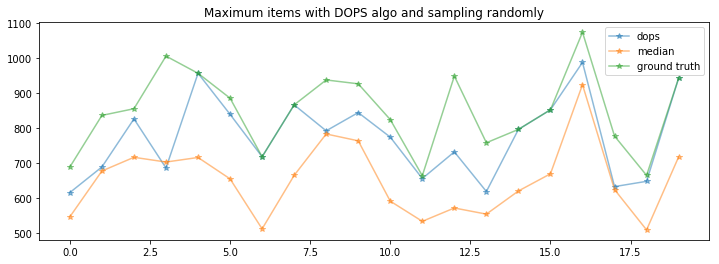

In [67]:
plt.figure(figsize=(12,4))
plt.plot(np.arange(0,20), pred, '*-', alpha=0.5, label='dops')
plt.plot(np.arange(0,20), rand, '*-', alpha=0.5, label='median')
plt.plot(np.arange(0,20), real, '*-', alpha=0.5, label='ground truth')
plt.legend()
plt.title('Maximum items with DOPS algo and sampling randomly')
plt.show()